In [3]:
%matplotlib inline
import sys 
sys.path.append('..')

from preamble import *



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print()
for i in range(10):
    print(X[i], y[i])

X.shape: (100, 1)
y.shape: (100,)

[-0.753] -0.3979485798878842
[2.704] 0.7105775485755936
[1.392] 0.41392866721449156
[0.592] -0.34838379365129424
[-2.064] -1.6020040642044855
[-2.064] -1.3135709853245343
[-2.651] -0.12426799844607195
[2.197] 1.1366058452312982
[0.607] 0.22684365004805757
[1.248] -0.10700112891754687


In [5]:
# linspace : -3 ~ 3 데이터를 n 개 추출

print("reshape 전")
line = np.linspace(-3, 3, 5, endpoint=False)
print(line.shape)
print(line)

print("reshape 후")
line = np.linspace(-3, 3, 5, endpoint=False).reshape(-1, 1)
print(line.shape)
print(line)

reshape 전
(5,)
[-3.  -1.8 -0.6  0.6  1.8]
reshape 후
(5, 1)
[[-3. ]
 [-1.8]
 [-0.6]
 [ 0.6]
 [ 1.8]]


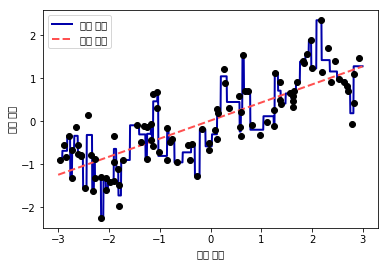

In [6]:
# linspace : -3 ~ 3 데이터를 1000 개 추출
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [7]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [8]:
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])



데이터 포인트:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [9]:
from sklearn.preprocessing import OneHotEncoder
# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)
# 원-핫-인코딩으로 변환합니다
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
print("X_binned.shape: {}".format(X_binned.shape))


X_binned.shape: (100, 10)


line_binned.shape: (1000, 10)
y.shape: (100,)


Text(0.5,0,'입력 특성')

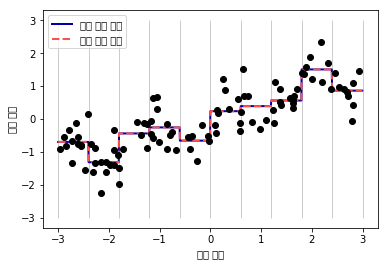

In [11]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

print("line_binned.shape:", line_binned.shape)
print("y.shape:", y.shape)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")